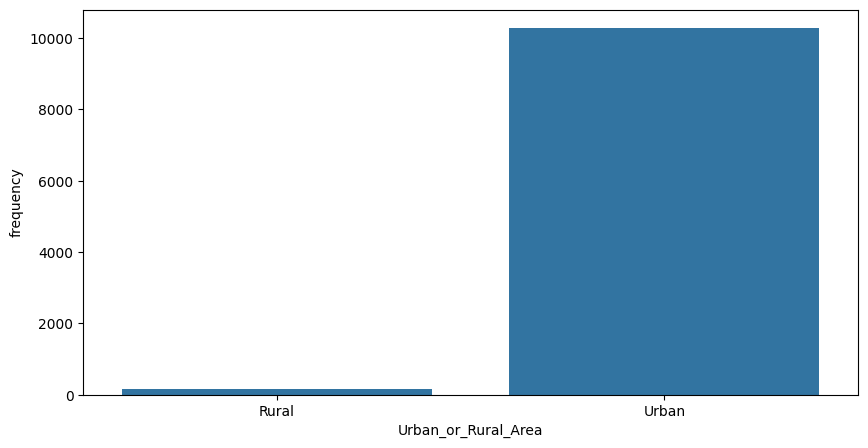

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df=pd.read_csv('/content/PythonProject.csv')
df.head(5)
df.isnull().sum()
df_clean=df.drop(columns=['Special_Conditions_at_Site','Carriageway_Hazards'])
df_clean['Time']
df.columns
df_clean['Urban_or_Rural_Area']
k=df_clean.groupby('Urban_or_Rural_Area')['Urban_or_Rural_Area'].value_counts().reset_index(name='frequency')
plt.figure(figsize=(10,5))
sns.barplot(x='Urban_or_Rural_Area',y='frequency',data=k)
plt.show()


In [8]:
df.head()
df.columns
df

,Unnamed: 0,Accident_Index,longitude,latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,...,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Date,Month,Weekend
0,0,1,78.610393,14.724026,1,Serious,1,1,Tuesday,17,...,Raining,Wet,NaN,NaN,Urban,Yes,E01002849,04-01-2018,1.0,0.0
1,1,2,78.534042,14.762353,1,Slight,1,1,Wednesday,17,...,Fine,Dry,NaN,NaN,Urban,Yes,E01002909,05-01-2018,1.0,0.0
2,2,3,78.470877,14.745606,1,Slight,2,1,Thursday,0,...,Fine,Dry,NaN,NaN,Urban,Yes,E01002857,06-01-2018,1.0,0.0
3,3,4,78.557994,14.667128,1,Slight,1,1,Friday,10,...,Fine,Dry,NaN,NaN,Urban,Yes,E01002840,07-01-2018,1.0,0.0
4,4,5,78.576431,14.703443,1,Slight,1,1,Monday,21,...,Fine,Wet,NaN,NaN,Urban,Yes,E01002863,10-01-2018,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10437,10458,10459,82.176960,22.077368,1,Serious,1,2,Saturday,21,...,Fine,Dry,NaN,NaN,Urban,Yes,E01003047,18-06-2018,6.0,0.0
10438,10459,10460,82.169659,22.107584,1,Slight,2,1,Tuesday,9,...,Fine,Dry,NaN,NaN,Urban,Yes,E01003039,21-06-2018,6.0,0.0
10439,10460,10461,82.124771,22.107919,1,Slight,3,1,Wednesday,22,...,Raining,Wet,NaN,NaN,Urban,Yes,E01003141,29-06-2018,6.0,0.0
10440,10461,10462,82.172968,22.055749,1,Slight,1,2,Wednesday,8,...,Fine,Dry,NaN,NaN,Urban,Yes,E01003042,29-06-2018,6.0,0.0


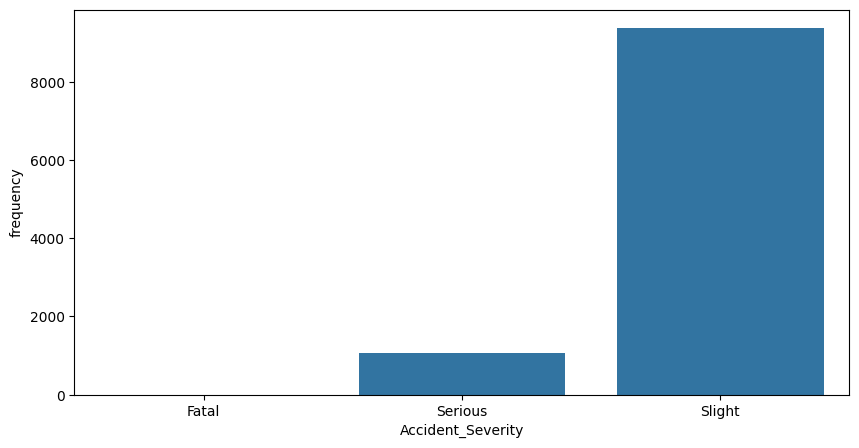

In [3]:
df_clean.columns
df_clean.head(5)
p=df.groupby('Accident_Severity')['Accident_Severity'].value_counts().reset_index(name='frequency')
plt.figure(figsize=(10,5))
sns.barplot(x='Accident_Severity',y='frequency',data=p)
plt.show()

<Axes: xlabel='Day_of_Week', ylabel='frequency'>

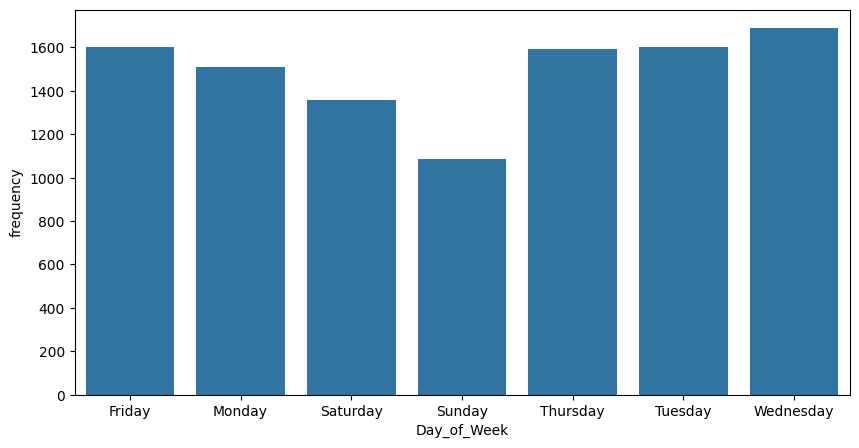

In [9]:
l=df.groupby('Day_of_Week')['Day_of_Week'].value_counts().reset_index(name='frequency')
plt.figure(figsize=(10,5))
sns.barplot(x='Day_of_Week',y='frequency',data=l)

<Axes: xlabel='Month', ylabel='frequency'>

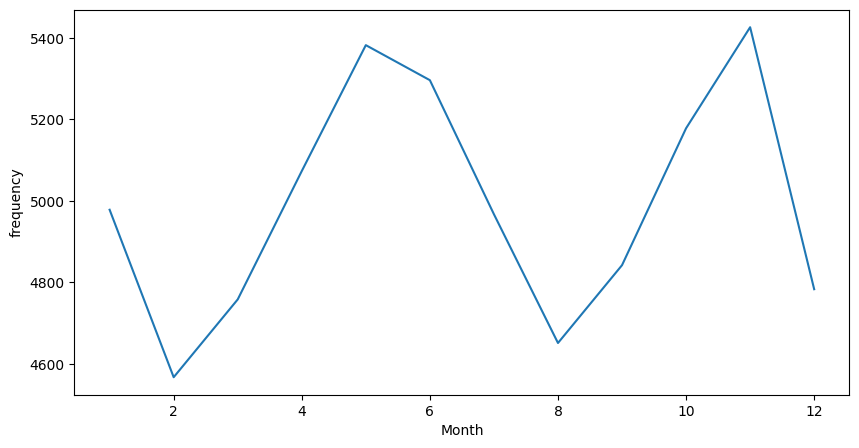

In [ ]:
df.columns
m=df.groupby('Month')['Month'].value_counts().reset_index(name='frequency')
plt.figure(figsize=(10,5))
sns.lineplot(x='Month',y='frequency',data=m)

<Axes: xlabel='Weather_Conditions', ylabel='frequency'>

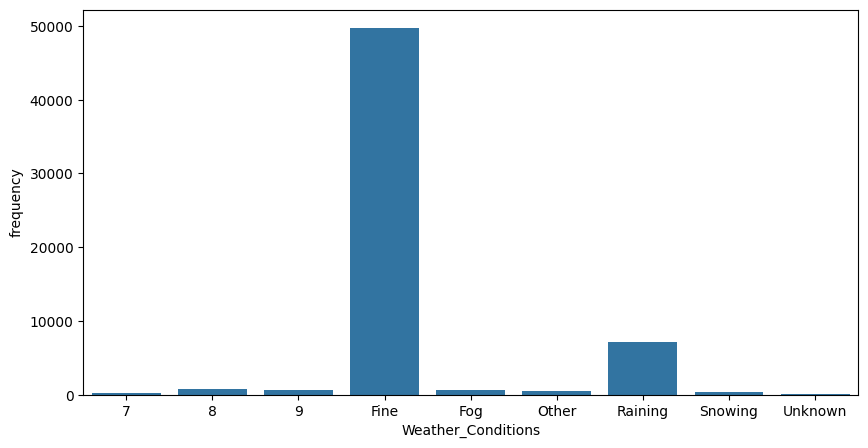

In [ ]:
#Accidents by Weather Conditions
n=df.groupby('Weather_Conditions')['Weather_Conditions'].value_counts().reset_index(name='frequency')
plt.figure(figsize=(10,5))
sns.barplot(x='Weather_Conditions',y='frequency',data=n)

In [ ]:
#Do weekends see a significantly higher number of accidents than weekdays?”
df_clean.columns
df_clean['Day_of_Week']
#	Perform a chi-square or t-test
import scipy.stats as stats
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekends = ['Saturday', 'Sunday']

df_clean['Is_Weekend'] = df_clean['Day_of_Week'].apply(lambda x: 'Weekend' if x in weekends else 'Weekday')
accident_counts = df_clean['Is_Weekend'].value_counts()
chi2, p_value = stats.chisquare(accident_counts)

print(f"Chi-square statistic: {chi2}, p-value: {p_value}")

if p_value < 0.05:
    print("There is a significant difference in the number of accidents between weekends and weekdays.")
else:
    print("No significant difference in accident counts between weekends and weekdays.")


Chi-square statistic: 15587.890836546969, p-value: 0.0
There is a significant difference in the number of accidents between weekends and weekdays.


<Axes: xlabel='Light_Conditions', ylabel='frequency'>

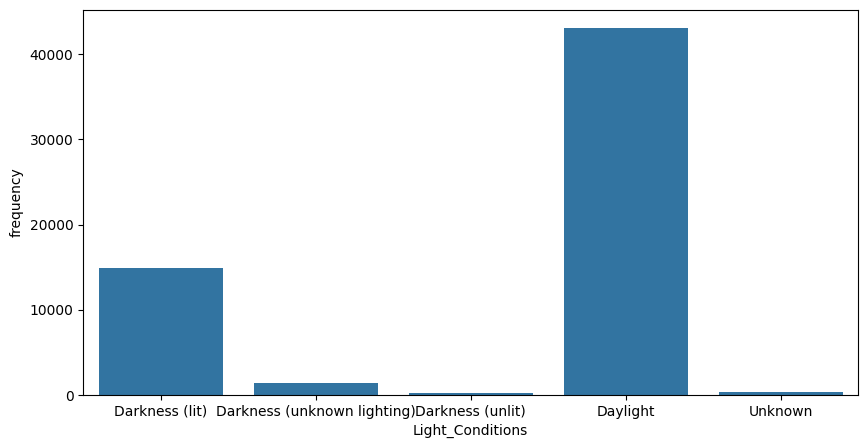

In [ ]:
#Light Conditions vs. Accident Severity
o=df.groupby('Light_Conditions')['Light_Conditions'].value_counts().reset_index(name='frequency')
plt.figure(figsize=(10,5))
sns.barplot(x='Light_Conditions',y='frequency',data=o)

<Axes: xlabel='Road_Type', ylabel='frequency'>

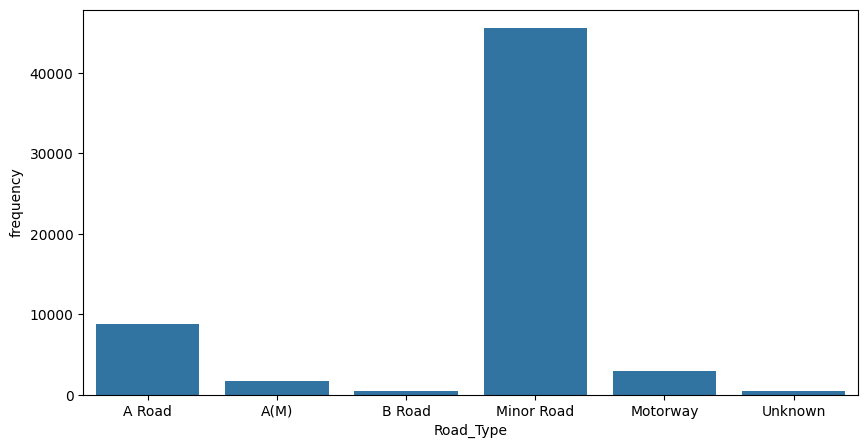

In [ ]:
#Accidents by Road Type
p=df.groupby('Road_Type')['Road_Type'].value_counts().reset_index(name='frequency')
plt.figure(figsize=(10,5))
sns.barplot(x='Road_Type',y='frequency',data=p)

In [ ]:
df_clean.to_csv('df_cleaning.csv',index=False)

#From the feature importance analysis, we found that accident risks peak during specific hours of the day. Surprisingly, weather conditions had a lower impact than expected, indicating that accidents happen regardless of bad weather. This insight helps in implementing targeted road safety measures during high-risk hours.
#

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Simulating a dataset (replace with actual dataset loading)
df_clean = pd.DataFrame({
    'longitude': np.random.uniform(-5, 5, 5000),
    'latitude': np.random.uniform(50, 60, 5000),
    'Day_of_Week': np.random.choice(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 5000),
    'Time': np.random.choice([f'{hour}:00' for hour in range(24)], 5000),
    'Weather_Conditions': np.random.choice(['Clear', 'Rain', 'Fog', 'Snow'], 5000),
    'Road_Surface_Conditions': np.random.choice(['Dry', 'Wet', 'Snow', 'Ice'], 5000),
    'Urban_or_Rural_Area': np.random.choice(['Urban', 'Rural'], 5000),
    'Speed_limit': np.random.choice([30, 40, 50, 60, 70], 5000),
    'Light_Conditions': np.random.choice(['Daylight', 'Darkness'], 5000),
    'Number_of_Vehicles': np.random.randint(1, 5, 5000),
    'Number_of_Casualties': np.random.randint(0, 3, 5000),
    'Road_Type': np.random.choice(['Single Carriageway', 'Dual Carriageway', 'Roundabout'], 5000),
})

# Extract hour from Time column
df_clean['Hour'] = pd.to_datetime(df_clean['Time'], format='%H:%M', errors='coerce').dt.hour

# Define "High-Accident Hour" based on top 20% of hours with most accidents
accident_counts_per_hour = df_clean['Hour'].value_counts()
threshold = np.percentile(accident_counts_per_hour, 80)

df_clean['High_Accident_Hour'] = df_clean['Hour'].apply(lambda x: 1 if accident_counts_per_hour[x] >= threshold else 0)

# Selecting features
features = ['longitude', 'latitude', 'Day_of_Week', 'Hour', 'Weather_Conditions',
            'Road_Surface_Conditions', 'Urban_or_Rural_Area', 'Speed_limit',
            'Light_Conditions', 'Number_of_Vehicles', 'Number_of_Casualties', 'Road_Type']
X = df_clean[features]
y = df_clean['High_Accident_Hour']

# Convert categorical variables to numeric
label_encoders = {}
for col in ['Day_of_Week', 'Weather_Conditions', 'Road_Surface_Conditions',
            'Urban_or_Rural_Area', 'Light_Conditions', 'Road_Type']:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le  # Store encoders for later use

# Standardize numerical features
scaler = StandardScaler()
X[['longitude', 'latitude', 'Speed_limit', 'Number_of_Vehicles', 'Number_of_Casualties']] = scaler.fit_transform(
    X[['longitude', 'latitude', 'Speed_limit', 'Number_of_Vehicles', 'Number_of_Casualties']]
)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle Imbalanced Data using SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Train Random Forest Classifier with Depth Limit to Avoid Overfitting
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train_bal, y_train_bal)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Feature Importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Display Results
accuracy, report, feature_importance


<ipython-input-14-cecc345aaf0d>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
<ipython-input-14-cecc345aaf0d>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
<ipython-input-14-cecc345aaf0d>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

(0.887,
 '              precision    recall  f1-score   support\n\n           0       0.94      0.91      0.93       767\n           1       0.74      0.80      0.77       233\n\n    accuracy                           0.89      1000\n   macro avg       0.84      0.86      0.85      1000\nweighted avg       0.89      0.89      0.89      1000\n',
                     Feature  Importance
 3                      Hour    0.559429
 7               Speed_limit    0.082954
 9        Number_of_Vehicles    0.069245
 10     Number_of_Casualties    0.064843
 0                 longitude    0.057161
 1                  latitude    0.051239
 2               Day_of_Week    0.028570
 5   Road_Surface_Conditions    0.020222
 4        Weather_Conditions    0.020059
 11                Road_Type    0.016915
 8          Light_Conditions    0.014860
 6       Urban_or_Rural_Area    0.014502)

In [ ]:
from sqlalchemy import create_engine
import urllib.parse
!pip install mysql-connector-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.0/34.0 MB 23.6 MB/s eta 0:00:00


In [ ]:
username = "root"
password = urllib.parse.quote_plus("Arpan@2002")  # URL-encode the password
host = "127.0.0.1"       # Use "127.0.0.1" or "localhost"
port = "3306"            # MySQL default port
database_name = "Project2"

# Create the SQLAlchemy engine
engine = create_engine(f"mysql+mysqlconnector://{username}:{password}@{host}:{port}/{database_name}")

# Test the connection
try:
    conn = engine.connect()
    print("Connection successful!")
    conn.close()
except Exception as e:
    print(f"Connection failed: {e}")

Connection failed: (mysql.connector.errors.InterfaceError) 2002: Can't connect to local MySQL server through socket '%-.100s' (%s) (Warning: not all arguments converted during string formatting)
(Background on this error at: https://sqlalche.me/e/20/rvf5)
